In [1]:
# Import packages
import Pkg

Pkg.add("Plots")
Pkg.add("QuantumWalk")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


Final state probabilities per node: [0.08516506654435613, 0.15078511409650477, 0.09297749105781704, 0.11195880163507925, 0.10752094106282134, 0.06482205060940456, 0.08429897733971085, 0.06334887545590066, 0.08145376509664301, 0.15766891737562788]


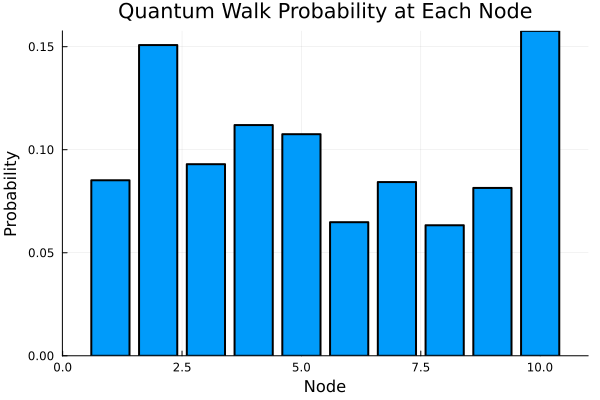

In [2]:
using QuantumWalk
using LightGraphs
using SparseArrays  # Ensure sparse matrix operations
using LinearAlgebra
using Plots

# Define a 4-node cycle graph
n = 10
graph = SimpleGraph(n)
for i in 1:n
    add_edge!(graph, i, mod(i, n) + 1)
end

# Compute the degree vector
deg = degree(graph)

# Construct the row-normalized stochastic matrix
A = adjacency_matrix(graph)  # Get adjacency matrix
P = spzeros(Float64, n, n)  # Create a sparse stochastic matrix

for i in 1:n
    if deg[i] > 0
        P[i, :] = A[i, :] ./ deg[i]  # Normalize by degree
    end
end

# Define Szegedy Quantum Walk
szegedy = Szegedy(graph, P)

# Initial state
state = rand(100); state = sparse(state/norm(state));

# Quantum walk evolution
qwe = QWEvolution(szegedy)
final_state = execute_single(qwe, state, 1000000)

# Compute probability distribution per node
probabilities_per_node = zeros(n)
for i in 1:n
    probabilities_per_node[i] = sum(abs2.(final_state[(i-1)*n+1 : i*n]))  # Sum over second index
end

println("Final state probabilities per node: ", probabilities_per_node)
# println("Final state: ", final_state)

# x = 1:16

# p = plot(x, final_state, label = "Final state", title = "Quantum Walk on a 4-node cycle graph")
# Plot probability distribution per node
x = 1:n
p = bar(x, probabilities_per_node, label="Probability", title="Quantum Walk Probability at Each Node",
        xlabel="Node", ylabel="Probability", lw=2, legend=false)
# display(p)